In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers

In [3]:
imgs_path = '../input/gtsrb-german-traffic-sign/Train'
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

In [4]:
labels_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [5]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [6]:
print(data.shape,labels.shape)

(39209, 32, 32, 3) (39209,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [9]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


2021-10-11 08:19:09.810339: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-11 08:19:09.814334: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-11 08:19:09.860283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-11 08:19:09.861282: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-11 08:19:09.861339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-11 08:19:09.893792: I tensorflow/stream_executor/platform/def

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

2021-10-11 08:19:35.694046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-11 08:19:35.711509: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/15


2021-10-11 08:19:36.834063: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-11 08:19:37.798117: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-11 08:19:37.827779: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


981/981 [==============================] - 15s 8ms/step - loss: 3.4689 - accuracy: 0.2934 - val_loss: 0.5436 - val_accuracy: 0.8565
Epoch 2/15
981/981 [==============================] - 6s 6ms/step - loss: 0.9159 - accuracy: 0.7281 - val_loss: 0.2985 - val_accuracy: 0.9216
Epoch 3/15
981/981 [==============================] - 6s 6ms/step - loss: 0.5688 - accuracy: 0.8244 - val_loss: 0.1511 - val_accuracy: 0.9588
Epoch 4/15
981/981 [==============================] - 6s 6ms/step - loss: 0.4163 - accuracy: 0.8710 - val_loss: 0.1246 - val_accuracy: 0.9675
Epoch 5/15
981/981 [==============================] - 6s 6ms/step - loss: 0.3782 - accuracy: 0.8866 - val_loss: 0.1070 - val_accuracy: 0.9679
Epoch 6/15
981/981 [==============================] - 6s 6ms/step - loss: 0.3308 - accuracy: 0.8999 - val_loss: 0.1030 - val_accuracy: 0.9736
Epoch 7/15
981/981 [==============================] - 6s 6ms/step - loss: 0.2970 - accuracy: 0.9108 - val_loss: 0.0989 - val_accuracy: 0.9748
Epoch 8/15
981/9

In [14]:
model.save("my_model.h5")

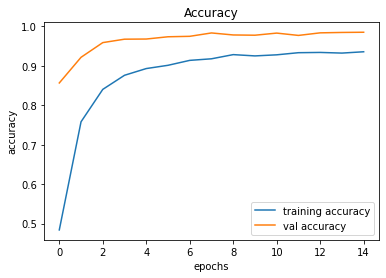

In [15]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

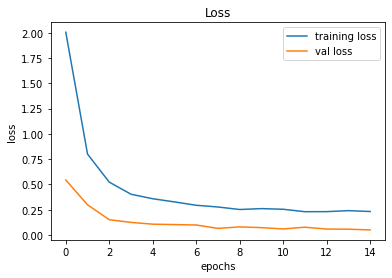

In [16]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
dic={0:'Speed Limit-20',1:'Speed Limit-30',2:'Speed Limit-50',3:'Speed Limit-60',4:'Speed Limit-70',5:'Speed Limit-80',6:'End of Maximum speed-80',
     7:'Speed Limit-100',8:'Speed Limit-120',9:'No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)',10:'No passing for vehicles with a total weight of over 3.5 t',
     11:'Indicates priority only at the upcoming intersection or crossing',12:'Priority Road starts',13:'Yield right-of-way',
     14:'STOP',15:'No entry for any type of Vehicle',16:'No entry for motor vehicles with a maximum authorized mass of more than 3.5 t',
     17:'Do not enter',18:'This is a general danger or warning sign.',19:'A single curve is approaching in the left direction',
     20:'A single curve is approaching in the right direction',
     21:'Indicates an approaching double curve - first to the left',22:'Warning of a rough road ahead.',23:'The danger of skidding or slipping.',
     24:'he road narrows from the right side',25:'Work in process',26:'Indicates the traffic signal ahead.',27:'Pedestrian crossing ahead.',
     28:'Pay attention to children ',29:'Be aware of cyclists',30:'Beware of an icy road ahead.',31:'Indicates wild animals may cross the road',
     32:'End of all previously set passing and speed restrictions',33:'Indicates that traffic must turn right',34:'ndicates that traffic must turn left',
     35:'The mandatory direction of travel is straight ahead. No turns are permitted',36:'Mandatory directions of travel, straight ahead or right',
     37:'Mandatory directions of travel, straight ahead or left',38:'Prescribed drive direction around the obstacle. Drive from the right of the obstacle.',39:'Prescribed drive direction around the obstacle. Drive from the left of the obstacle',
     40:'Indicates entrance to a traffic circle',41:'End of the no-passing zone for vehicles under 3.5 t',42:'End of all passing (overtaking) restrictions'}

In [18]:
dic

{0: 'Speed Limit-20',
 1: 'Speed Limit-30',
 2: 'Speed Limit-50',
 3: 'Speed Limit-60',
 4: 'Speed Limit-70',
 5: 'Speed Limit-80',
 6: 'End of Maximum speed-80',
 7: 'Speed Limit-100',
 8: 'Speed Limit-120',
 9: 'No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)',
 10: 'No passing for vehicles with a total weight of over 3.5 t',
 11: 'Indicates priority only at the upcoming intersection or crossing',
 12: 'Priority Road starts',
 13: 'Yield right-of-way',
 14: 'STOP',
 15: 'No entry for any type of Vehicle',
 16: 'No entry for motor vehicles with a maximum authorized mass of more than 3.5 t',
 17: 'Do not enter',
 18: 'This is a general danger or warning sign.',
 19: 'A single curve is approaching in the left direction',
 20: 'A single curve is approaching in the right direction',
 21: 'Indicates an approaching double curve - first to the left',
 22: 'Warning of a rough road ahead.',
 23: 'The danger of skidding or slipping.',

In [19]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random

In [20]:
random_list=[]
for i in range(0,6):
    n=random.randint(10,42)
    random_list.append(n)
print(random_list)

[15, 13, 11, 16, 21, 35]


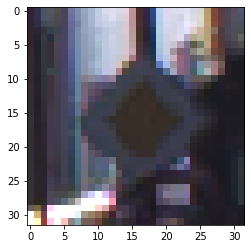

Predicted: Beware of an icy road ahead.


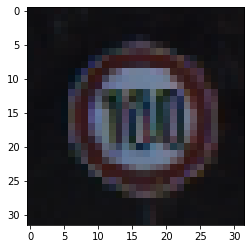

Predicted: Speed Limit-100


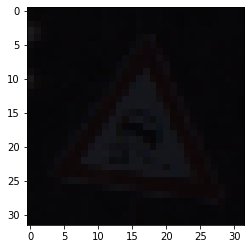

Predicted: The danger of skidding or slipping.


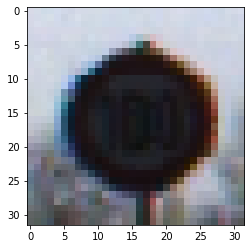

Predicted: Speed Limit-100


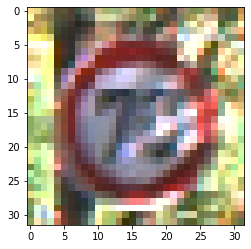

Predicted: Speed Limit-70


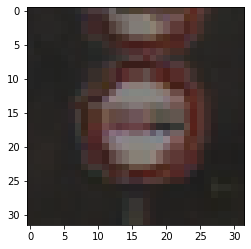

Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


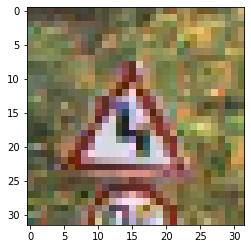

Predicted: Indicates an approaching double curve - first to the left


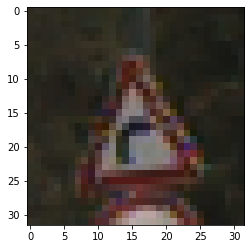

Predicted: A single curve is approaching in the right direction


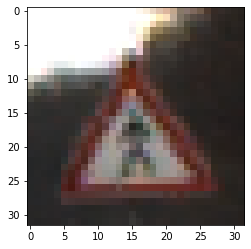

Predicted: Pedestrian crossing ahead.


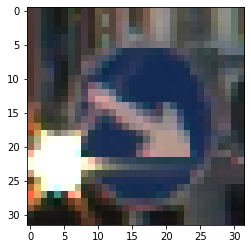

Predicted: Prescribed drive direction around the obstacle. Drive from the right of the obstacle.


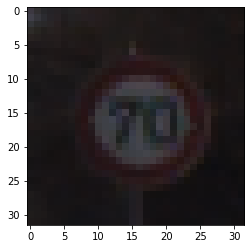

Predicted: Speed Limit-70


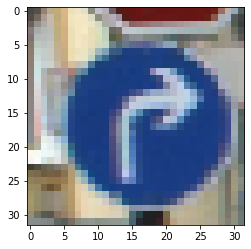

Predicted: Indicates that traffic must turn right


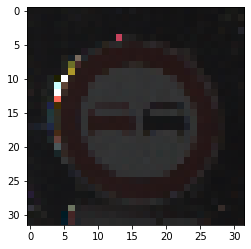

Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


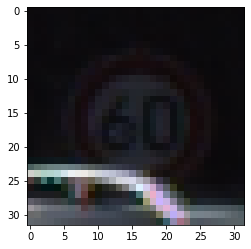

Predicted: Speed Limit-60


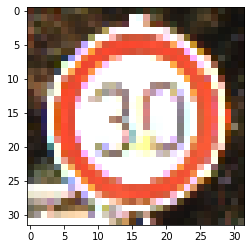

Predicted: Speed Limit-30


In [21]:
for i in range(10,25):
    image_path='../input/gtsrb-german-traffic-sign/Test/000'+str(i)+'.png'
    img=image.load_img(image_path,target_size=(32,32,3))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images)
    label=np.argmax(pred,axis=1)
    print('Predicted: '+dic[np.argmax(pred)])